In [1]:
from random import random, uniform
from matplotlib import pyplot as plt
import numpy as np
import math

итерироваться по линии

In [2]:
def points_to_line(x1, y1, x2, y2):
    if x1 != x2:
        k = (y2-y1)/(x2-x1)
        b = y1-k*x1
    return k, b

def intersect_line_map(k, b, n=10, n_line=100):
    eps = 0.000001
    map_2d_now = np.zeros((n, n))
    '''
    if k>0:
        mini = -b/k
        maxi = (n - b)/k
    elif k<0:
        mini = (n - b)/k
        maxi = -b/k
    '''
    mini=0
    maxi=n
    x_iter = np.linspace(max(0, mini), min(maxi, n) - eps, n_line)
    for x_n in x_iter:
        y_n = k*x_n+b
        if 0 <= y_n < n:
            i, j = math.floor(x_n), math.floor(y_n)
            map_2d_now[i][j] = 1
    return map_2d_now



In [3]:
def make_2d_map(n=10, n_line=100, num_lines=100):
    '''
    Генерируем 2 случайные точки внутри квадрата
    '''
    map_2d = np.zeros((n, n))
    for i in range(num_lines):
        x1, y1, x2, y2 = uniform(0, n), uniform(0, n), uniform(0, n), uniform(0, n)
        k, b = points_to_line(x1, y1, x2, y2)
        map_2d += intersect_line_map(k, b, n, n_line)
    print("std is ", np.std(map_2d))
    return map_2d


def make_2d_map_2(n=10, n_line=100, num_lines=100):
    '''
    Генерируем угол + 1 точку внутри квадрата
    '''
    map_2d = np.zeros((n, n))
    for i in range(num_lines):
        alpha = uniform(0, 2*np.pi)
        k = math.tan(alpha)
        x1, y1 = uniform(0, n), uniform(0, n)
        b = y1 - k*x1
        map_2d += intersect_line_map(k, b, n, n_line)
    print("std is ", np.std(map_2d))
    return map_2d

def make_2d_map_3(n=10, n_line=100, num_lines=100):
    '''
    Генерируем угол + 1 точку внутри квадрата (-n, 2n)
    '''
    map_2d = np.zeros((n, n))
    for i in range(num_lines):
        alpha = uniform(0, 360)
        k = math.tan(math.radians(alpha))
        x1, y1 = uniform(-n, 2*n), uniform(-n, 2*n)
        b = y1 - k*x1
        map_2d += intersect_line_map(k, b, n, n_line)
    print("std is ", np.std(map_2d))
    return map_2d


def make_2d_map_4(n=10, n_line=100, num_lines=100):
    '''
    Генерируем 2 случайные точки внутри квадрата (-n, 2n)
    '''
    map_2d = np.zeros((n, n))
    for i in range(num_lines):
        x1, y1, x2, y2 = uniform(-n, 2*n), uniform(-n, 2*n), uniform(-n, 2*n), uniform(-n, 2*n)
        k, b = points_to_line(x1, y1, x2, y2)
        map_2d += intersect_line_map(k, b, n, n_line)
    print("std is ", np.std(map_2d))
    return map_2d


std is  304.724514172654
Wall time: 1min 52s


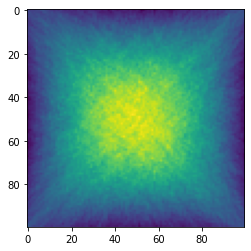

In [4]:
%%time
plt.imshow(make_2d_map(n=100, n_line=1000, num_lines=100000))

std is  3011.6346300889486
Wall time: 18min 11s


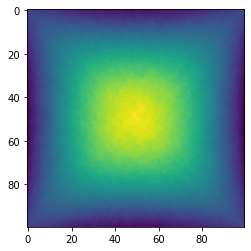

In [5]:
%%time
plt.imshow(make_2d_map(n=100, n_line=1000, num_lines=1000000))

std is  151.20440125538673
Wall time: 1min 43s


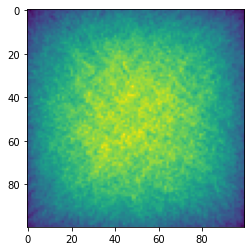

In [6]:
%%time
plt.imshow(make_2d_map_2(n=100, n_line=1000, num_lines=100000))

std is  1472.0310052852963
Wall time: 17min 16s


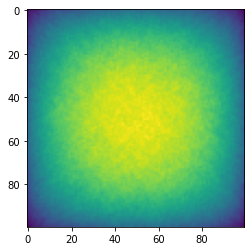

In [7]:
%%time
plt.imshow(make_2d_map_2(n=100, n_line=1000, num_lines=1000000))

std is  22.211223721128018
Wall time: 1min 11s


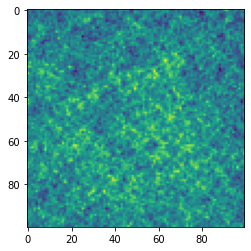

In [8]:
%%time
plt.imshow(make_2d_map_3(n=100, n_line=1000, num_lines=100000))

std is  85.10325622154537
Wall time: 12min 11s


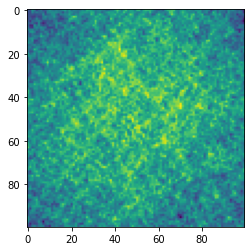

In [9]:
%%time
plt.imshow(make_2d_map_3(n=100, n_line=1000, num_lines=1000000))

std is  32.51971074348602
Wall time: 1min 19s


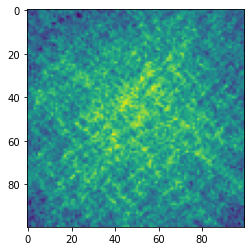

In [10]:
%%time
plt.imshow(make_2d_map_4(n=100, n_line=1000, num_lines=100000))

std is  216.75130950570977
Wall time: 13min 23s


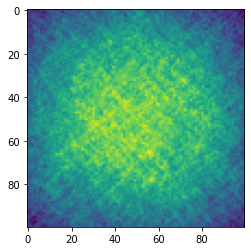

In [11]:
%%time
plt.imshow(make_2d_map_4(n=100, n_line=1000, num_lines=1000000))